In [1]:
year = 2023
day = 18

In [134]:
from aocd import submit
from aocd.models import Puzzle
from functools import reduce
import numpy as np

puzzle = Puzzle(year=year, day=day)
data = puzzle.input_data
# data = puzzle.examples[0].input_data

data = data.strip()
data = data.split("\n")

data = [d.split() for d in data]
data[:5]

[['R', '7', '(#32c140)'],
 ['U', '2', '(#253c23)'],
 ['R', '5', '(#1e70a0)'],
 ['U', '4', '(#584ec3)'],
 ['L', '5', '(#24a120)']]

In [135]:
headings = {
    "U": (-1, 0),
    "D": (1, 0),
    "L": (0, -1),
    "R": (0, 1),
}

In [136]:
all_points = []
y, x = (0, 0)
for h, n, col in data:
    d_y, d_x = headings[h]
    n = int(n)
    for _ in range(n):
        y += d_y
        x += d_x
        all_points.append((y, x))

In [137]:
min_y = min([y for y, x in all_points])
min_x = min([x for y, x in all_points])
max_y = max([y for y, x in all_points])
max_x = max([x for y, x in all_points])
print(min_y, min_x, max_y, max_x)

-42 -5 212 386


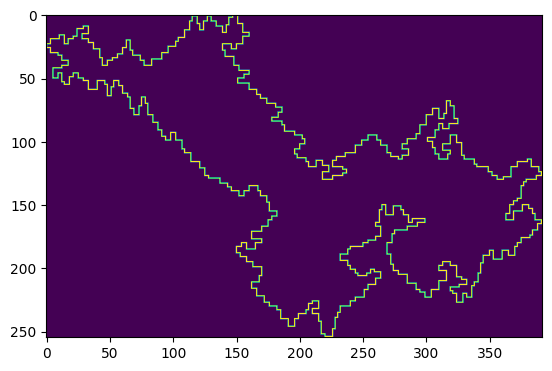

In [138]:
vis = np.zeros((max_y - min_y + 1, max_x - min_x + 1), dtype=int)

for y, x in all_points:
    vis[y - min_y, x - min_x] += 1

import matplotlib.pyplot as plt

plt.imshow(vis)

In [139]:
to_visit = {(150, 200)}
while to_visit:
    new_to_visit = set()
    for y, x in to_visit:
        for d_y, d_x in headings.values():
            new_y = y + d_y
            new_x = x + d_x
            if 0 <= new_y < vis.shape[0] and 0 <= new_x < vis.shape[1]:
                if vis[new_y, new_x] == 0:
                    vis[new_y, new_x] = 1
                    new_to_visit.add((new_y, new_x))
    to_visit = new_to_visit

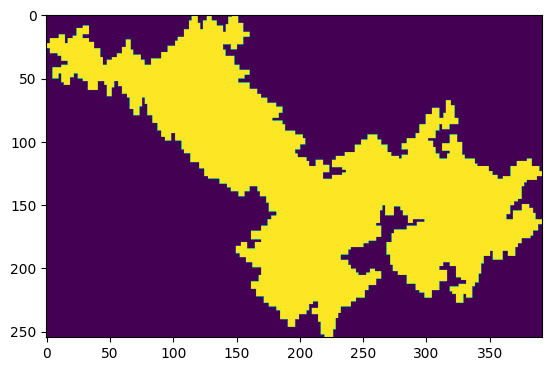

In [140]:
plt.imshow(vis)

In [141]:
answer = np.sum(np.sum(vis))
submit(answer, part="a", year=year, day=day)

coerced int64 value 34329 for 2023/18


Part a already solved with same answer: 34329


In [144]:
headings_list = ["R", "D", "L", "U"]

hex_data = []
for _, _, d in data:
    d = d.replace("(#", "")
    d = d.replace(")", "")

    n = int(d[:-1], 16)
    direction = headings_list[int(d[-1])]

    hex_data.append((direction, n))

In [146]:
all_points = []
y, x = (0, 0)
for h, n in hex_data:
    d_y, d_x = headings[h]
    y += d_y*n
    x += d_x*n
    all_points.append((y, x))

In [147]:
def shoelace(all_points):
    interior = 0
    for i in range(len(all_points)):
        y = all_points[i][0]
        x_prev = all_points[i-1][1]
        x_next = all_points[(i+1)%len(all_points)][1]

        interior += y * (x_prev - x_next)
    return interior // 2 # puzzle input will have integer solution

In [150]:
# shoelace formula will compute the area of the polygon, as seen from the
# center of the coordinates. To get the full area need to add the area of the edges
# area of the edges = 0.5 for each edge + 0.25 for the four corners that don't get cancelled out at the end of the loop
edges = sum(int(n) for _, n, in hex_data) // 2 + 1
answer = shoelace(all_points) + edges
answer

42617947302920

In [151]:
submit(answer, part="b", year=year, day=day)

Part b already solved with same answer: 42617947302920
